### Import necessary packages

In [10]:
from datetime import datetime
#import it in console with: pip install pandas-datareader
import pandas_datareader.data as wb
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import matplotlib as mpl

### Load the data
Input:

| Argument   | Description                             |
|------------|-----------------------------------------|
| ticker     | list of choosen tickers                 |
| start_date | starte date of search in YYY-M-D format |
| end_date   | end of date search in YYYY-M-D format   |

Output: Pandas DataFrame with finance data from Yahoo

In [11]:
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe
start = datetime(1990, 1, 1)
end = datetime(2021, 5, 5)
df = get_data_from_api("MSFT", start, end)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,0.616319,0.598090,0.605903,0.616319,53035200.0,0.391455
1990-01-03,0.626736,0.614583,0.621528,0.619792,113774400.0,0.393661
1990-01-04,0.638889,0.616319,0.619792,0.638021,125740800.0,0.405239


### Visualize smoothing averages

In [12]:
close_px = df['Close']
MA5 = close_px.rolling(window = 5).mean()
MA20 = close_px.rolling(window = 20).mean()
MA100 = close_px.rolling(window = 100).mean()
MA200 = close_px.rolling(window = 200).mean()

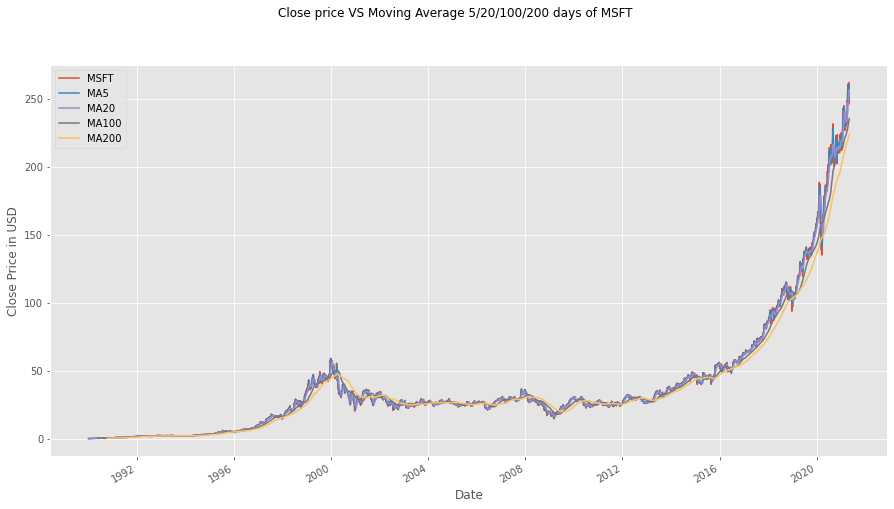

In [13]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
MA20.plot(label = 'MA20')
MA100.plot(label = 'MA100')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5/20/100/200 days of MSFT')
plt.legend()